# Importing libraries

In [4]:
### To activate GPU on Google Cloud
!nvidia-smi

Sun Jul  3 12:38:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import datetime

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import and append multiple files as single DataFrame

In [ ]:
e1 = pd.DataFrame()

path = 'D:/Elai_Workings/Kovai_Assignment/Activity Recognition'

all_files = glob.glob(path + "/*.csv")

for files in all_files:
    df = pd.read_csv(files, header=None, names=['S_No','x_Accelaration','y_Accelaration','z_Accelaration','Label'])
    df['File_name'] = files
    e1 = pd.concat([e1,df], ignore_index=True)


In [7]:
e1 = pd.read_csv("/content/drive/MyDrive/Assignment/Activity_Recognition_Combined_Files.csv")

In [8]:
e1.head()

,Unnamed: 0,S_No,x_Accelaration,y_Accelaration,z_Accelaration,Label,File_name
0,0,0.0,1502,2215,2153,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
1,1,1.0,1667,2072,2047,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
2,2,2.0,1611,1957,1906,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
3,3,3.0,1601,1939,1831,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
4,4,4.0,1643,1965,1879,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...


In [9]:
e1.shape

(1926896, 7)

In [10]:
e1.dtypes

Unnamed: 0          int64
S_No              float64
x_Accelaration      int64
y_Accelaration      int64
z_Accelaration      int64
Label               int64
File_name          object
dtype: object

In [11]:
e1['S_No'] = e1['S_No'].astype(np.int64)

In [9]:
e1.columns

Index(['Unnamed: 0', 'S_No', 'x_Accelaration', 'y_Accelaration',
       'z_Accelaration', 'Label', 'File_name'],
      dtype='object')

In [12]:
e1 = e1[['S_No', 'x_Accelaration', 'y_Accelaration','z_Accelaration', 'Label', 'File_name']]

In [13]:
e1.dtypes

S_No               int64
x_Accelaration     int64
y_Accelaration     int64
z_Accelaration     int64
Label              int64
File_name         object
dtype: object

In [14]:
e1.head()

,S_No,x_Accelaration,y_Accelaration,z_Accelaration,Label,File_name
0,0,1502,2215,2153,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
1,1,1667,2072,2047,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
2,2,1611,1957,1906,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
3,3,1601,1939,1831,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
4,4,1643,1965,1879,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...


In [15]:
e1.describe().T

,count,mean,std,min,25%,50%,75%,max
S_No,1926896.0,67112.826657,41461.908989,0.0,32114.0,64229.0,98394.0,166740.0
x_Accelaration,1926896.0,1987.652176,111.357792,282.0,1904.0,1992.0,2076.0,3828.0
y_Accelaration,1926896.0,2382.522846,100.315089,2.0,2337.0,2367.0,2413.0,4095.0
z_Accelaration,1926896.0,1970.596134,94.458932,1.0,1918.0,1988.0,2032.0,4095.0
Label,1926896.0,3.882898,2.443402,0.0,1.0,4.0,7.0,7.0


In [16]:
e1.Label.value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: Label, dtype: int64

In [17]:
e1.Label.value_counts(normalize = True) 

1    0.315880
7    0.308041
4    0.185305
3    0.112480
5    0.026726
2    0.024847
6    0.024791
0    0.001930
Name: Label, dtype: float64

In [18]:
e1.isnull().sum()

S_No              0
x_Accelaration    0
y_Accelaration    0
z_Accelaration    0
Label             0
File_name         0
dtype: int64

In [15]:
e1.columns

Index(['S_No', 'x_Accelaration', 'y_Accelaration', 'z_Accelaration', 'Label',
       'File_name'],
      dtype='object')

In [ ]:
# !pip install xgboost

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score


In [17]:
e1.head()

,S_No,x_Accelaration,y_Accelaration,z_Accelaration,Label,File_name
0,0,1502,2215,2153,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
1,1,1667,2072,2047,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
2,2,1611,1957,1906,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
3,3,1601,1939,1831,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
4,4,1643,1965,1879,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...


In [20]:
e1[['x_Accelaration', 'y_Accelaration', 'z_Accelaration']] = MinMaxScaler().fit_transform(e1[['x_Accelaration', 'y_Accelaration', 'z_Accelaration']])

In [19]:
e1.head()

,S_No,x_Accelaration,y_Accelaration,z_Accelaration,Label,File_name
0,0,0.344050,0.540679,0.525647,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
1,1,0.390581,0.505742,0.499756,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
2,2,0.374788,0.477645,0.465315,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
3,3,0.371968,0.473247,0.446996,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...
4,4,0.383813,0.479599,0.458720,1,D:/Elai_Workings/Kovai_Assignment/Activity Rec...


In [21]:
x = e1[['x_Accelaration', 'y_Accelaration', 'z_Accelaration']]
y = e1['Label']

In [21]:
x.head()

,x_Accelaration,y_Accelaration,z_Accelaration
0,0.344050,0.540679,0.525647
1,0.390581,0.505742,0.499756
2,0.374788,0.477645,0.465315
3,0.371968,0.473247,0.446996
4,0.383813,0.479599,0.458720


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

## Implement SMOTE for IMBALANCED DATASET

In [ ]:
# !pip install imblearn

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
oversample = SMOTE()

x, y = oversample.fit_resample(x, y)

In [24]:
x.shape, y.shape

((4869336, 3), (4869336,))

In [25]:
y.value_counts()

1    608667
2    608667
3    608667
4    608667
5    608667
6    608667
7    608667
0    608667
Name: Label, dtype: int64

## Train - Test - Split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

## Creating a function to run multiple models

In [ ]:
# def run_model(model):
#   model.fit(x_train, y_train)
#   preds = model.predict(x_test)
#   print(confusion_matrix(y_test, preds))
#  print("\n")
#  print("---"*10)
#  print("\n")
#  print("Accuracy Score is: ", accuracy_score(y_test,preds))

In [27]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test,y_pred_knn)
knn_cm = confusion_matrix(y_test,y_pred_knn)

print("KNN Accuracy is: ", knn_accuracy)
print("KNN Confusion Matrix is :", knn_cm)

KNN Accuracy is:  0.7747804115687216
KNN Confusion Matrix is : [[180459    751    164    402    305    240    271    360]
 [  3446 142837  14825   4526   5140   4479   2402   4617]
 [  1052   8064 159835   3157   4437   2554   1653   2366]
 [  2125   3899   6854 125450  14321  12128   8320   9272]
 [  3096   6298  11811  19885 110206  16236   8976   6371]
 [  1204   2485   2906   9983   8079 150442   5026   2675]
 [  1152   1729   2402   6268   5466   7200 153540   4447]
 [  2952   5715   8659  19389  11469   9623  15369 109031]]


In [28]:
LR = linear_model.LogisticRegression(random_state=18,multi_class='multinomial')

LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

LR_accuracy = accuracy_score(y_test,y_pred_LR)
LR_cm = confusion_matrix(y_test,y_pred_LR)

print("LR Accuracy is: ", LR_accuracy)
print("LR Confusion Matrix is :", LR_cm)

LR Accuracy is:  0.2617502315510463
LR Confusion Matrix is : [[147957    262   4981     96   5763   1349  22534     10]
 [ 37312    865  43366    140  34013  49298  17135    143]
 [ 27711   4892  54939    697  39766  28961  25744    408]
 [ 24533   1990  43935    184  29702  27374  53655    996]
 [ 35074   9422  38771    819  27850  38885  30849   1209]
 [ 33631   2775  27557    320  17884  59602  39768   1263]
 [ 16284   3527  34654    297  14110  22961  90021    350]
 [ 33568   6001  43718    776  25782  23175  48240    947]]


In [29]:
MNB = MultinomialNB()

MNB.fit(x_train,y_train)
y_pred_MNB = MNB.predict(x_test)

MNB_accuracy = accuracy_score(y_test,y_pred_MNB)
MNB_cm = confusion_matrix(y_test,y_pred_MNB)

print("MNB Accuracy is: ", MNB_accuracy)
print("MNB Confusion Matrix is :", MNB_cm)

MNB Accuracy is:  0.1573191694145883
MNB Confusion Matrix is : [[     0  11699      0      0      0      0 116182  55071]
 [     5  43546      0      0      6     11  59842  78862]
 [     0  40815      0      0      0      0  67253  75050]
 [     0  36911      0      0      0      0  84007  61451]
 [     0  48165      0      0      0      0  62075  72639]
 [     3  34571      0      0      0      0  70424  77802]
 [     0  17228      0      0      0      0 101729  63247]
 [     0  24416      0      0      0      2  73252  84537]]


In [23]:
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)
y_pred_DTC = DTC.predict(x_test)

DTC_accuracy = accuracy_score(y_test,y_pred_DTC)
DTC_cm = confusion_matrix(y_test,y_pred_DTC)

print("DTC Accuracy is: ", DTC_accuracy)
print("DTC Confusion Matrix is :", DTC_cm)

DTC Accuracy is:  0.765585456198346
DTC Confusion Matrix is : [[177718    772    517    836   1112    635    627    735]
 [  1036 149674   7544   4282   7413   2424   1539   8360]
 [   777   8082 150684   5216   8013   3420   2716   4210]
 [  1102   5022   5319 119646  17046  11489   7614  15131]
 [  1577   7733   8662  18929 111301  13709   7885  13083]
 [   953   2804   3417  11409  12457 139779   6885   5096]
 [   839   1630   2721   7974   7598   7461 146050   7931]
 [   779   9370   4205  16524  14259   5312   8242 123516]]


In [24]:
ABC = AdaBoostClassifier()

ABC.fit(x_train,y_train)
y_pred_ABC = ABC.predict(x_test)

ABC_accuracy = accuracy_score(y_test,y_pred_ABC)
ABC_cm = confusion_matrix(y_test,y_pred_ABC)

print("ABC Accuracy is: ", ABC_accuracy)
print("ABC Confusion Matrix is :", ABC_cm)

ABC Accuracy is:  0.36287488850295146
ABC Confusion Matrix is : [[142993   2779   6427   6070  12684   6037   3881   2081]
 [ 27218  83859  49203   2206   8324   2260   3494   5708]
 [  6469  44919  67969  14206  17965   7310   9636  14644]
 [ 13917  20808  27326  37292  24666  10694  29192  18474]
 [ 16283  25831  22946  12297  57343  23330  13047  11802]
 [ 18422  24155  10445   7164  43398  27451  36015  15750]
 [ 25998   9653  11787  12139  34222   8437  62813  17155]
 [ 32623  16140  32777  15657  12592   4819  17231  50368]]


In [28]:
GBC = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1)

GBC.fit(x_train,y_train)
y_pred_GBC = GBC.predict(x_test)

GBC_accuracy = accuracy_score(y_test,y_pred_GBC)
GBC_cm = confusion_matrix(y_test,y_pred_GBC)

print("GBC Accuracy is: ", GBC_accuracy)
print("GBC Confusion Matrix is :", GBC_cm)

GBC Accuracy is:  0.38713007452760506
GBC Confusion Matrix is : [[129789   1391   1152   7313   3773  17093  20248   2193]
 [ 27705 113331  17987   1321   1750   3266   7415   9497]
 [ 11629  46551  54300   5058  11693   8722  20485  24680]
 [ 10780  23275  22160  25602  10795  10830  42620  36307]
 [  9896  18946  19186  10869  44301  27909  32927  18845]
 [ 14001  25469  12358   8505  24386  37169  40382  20530]
 [  9427  13305   9913  10318  12923  10856  92238  23224]
 [ 27997  19036  15134  11713   3729   5655  30153  68790]]


In [32]:
Model_Accuracies = { 
    'Models' : ['KNN','LogisticRegression',' MultinomialNB','Decision Tree Classifier',  'AdaBoost', 'Gradient Boosting Classifier'],
    'Accuracy' : [0.7747804115687216,0.2617502315510463,0.1573191694145883,0.765585456198346,0.36287488850295146,0.38713007452760506]
}

In [33]:
Model_Accuracy_Output = pd.DataFrame(data = Model_Accuracies)
Model_Accuracy_Output.set_index("Models", inplace = True)

Text(0.5, 0, 'Accuracies')

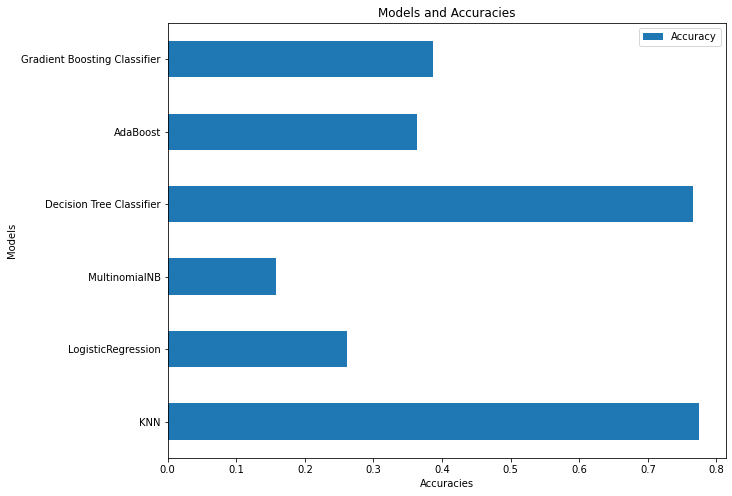

In [34]:
Model_Accuracy_Output.plot.barh(figsize = (10,8))
plt.title("Models and Accuracies")
plt.xlabel("Accuracies")

###                Comparison between multiple classification techniques, we can finally choose the KNN("77.48%" of accuracy) model, which is providing the better result than other models.